In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Project 
## Store Sales EDA Analysis

In [55]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\store_sales.csv")

# Data Info

In [56]:
df.shape

(7300, 5)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7300 non-null   object 
 1   store    7300 non-null   int64  
 2   sales    7300 non-null   float64
 3   promo    7300 non-null   int64  
 4   holiday  7300 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 285.3+ KB


In [58]:
df.head()

,date,store,sales,promo,holiday
0,2022-01-01,1,184.78,0,0
1,2022-01-02,1,192.62,0,0
2,2022-01-03,1,212.68,0,0
3,2022-01-04,1,249.58,1,0
4,2022-01-05,1,223.50,0,0


# Data Handling & Cleaning

In [59]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [60]:
df["date"]=pd.to_datetime(df["date"])

# EDA & Visualization

In [61]:
df.head()

,date,store,sales,promo,holiday
0,2022-01-01,1,184.78,0,0
1,2022-01-02,1,192.62,0,0
2,2022-01-03,1,212.68,0,0
3,2022-01-04,1,249.58,1,0
4,2022-01-05,1,223.50,0,0


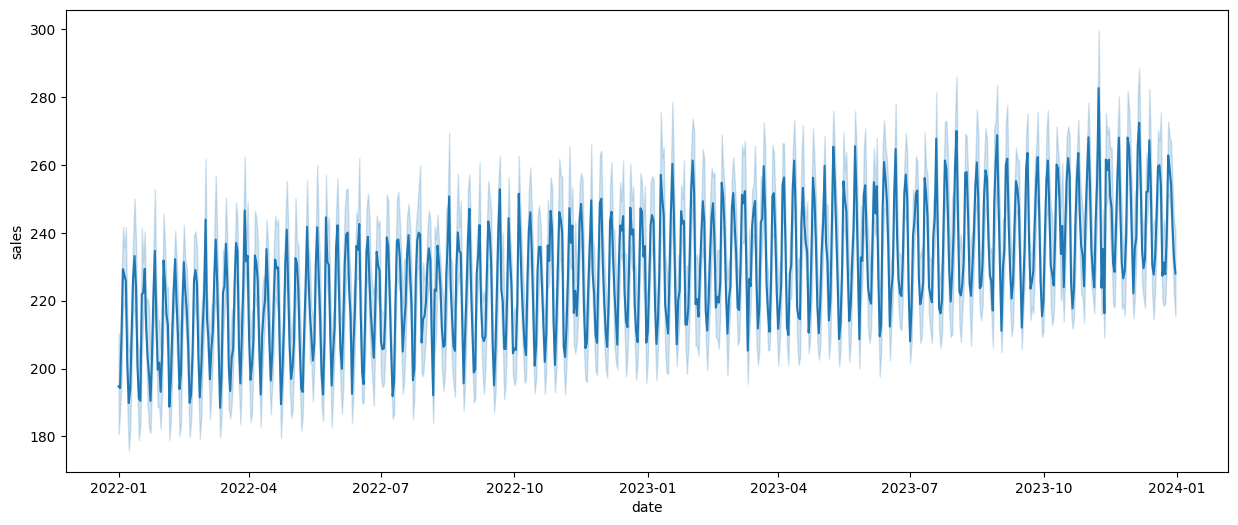

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x="date",y="sales")
plt.show()

In [64]:
# Basic stats
print(df.describe())
print(df.info())

# Extract time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()


                      date        store        sales        promo      holiday
count                 7300  7300.000000  7300.000000  7300.000000  7300.000000
mean   2022-12-31 12:00:00     5.500000   228.434571     0.202192     0.104110
min    2022-01-01 00:00:00     1.000000   160.710000     0.000000     0.000000
25%    2022-07-02 00:00:00     3.000000   209.217500     0.000000     0.000000
50%    2022-12-31 12:00:00     5.500000   226.795000     0.000000     0.000000
75%    2023-07-02 00:00:00     8.000000   245.590000     0.000000     0.000000
max    2023-12-31 00:00:00    10.000000   340.730000     1.000000     1.000000
std                    NaN     2.872478    26.625636     0.401662     0.305424
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7300 non-null   datetime64[ns]
 1   store    7300 non-null   int64         
 2 

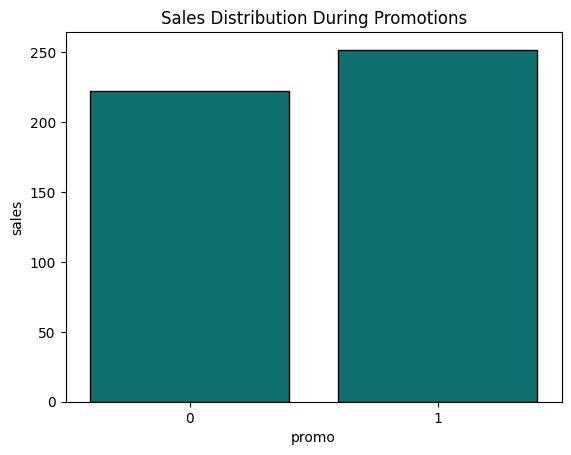

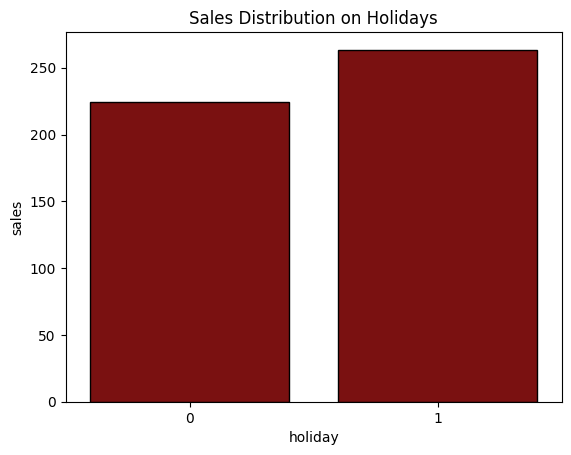

In [75]:
# Boxplot - Sales during promotions and holidays
sns.barplot(x='promo', y='sales', data=df,ci=None,color="Teal",edgecolor="black")
plt.title('Sales Distribution During Promotions')
plt.show()

sns.barplot(x='holiday', y='sales', data=df,color="darkred",edgecolor="black",ci=None)
plt.title('Sales Distribution on Holidays')
plt.show()


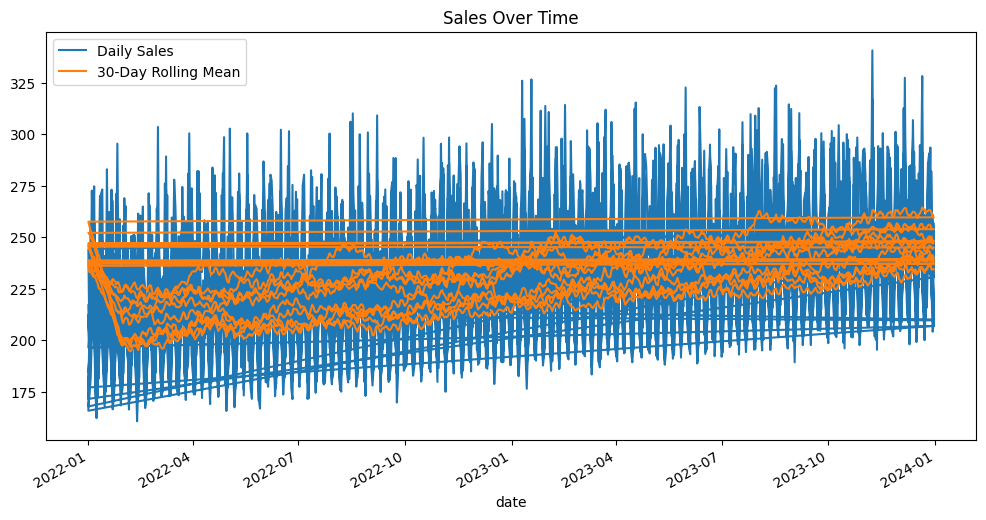

In [76]:
# Line plot with rolling mean
df.set_index('date', inplace=True)
df['sales'].plot(figsize=(12, 6), label='Daily Sales')
df['sales'].rolling(window=30).mean().plot(label='30-Day Rolling Mean')
plt.title('Sales Over Time')
plt.legend()
plt.show()


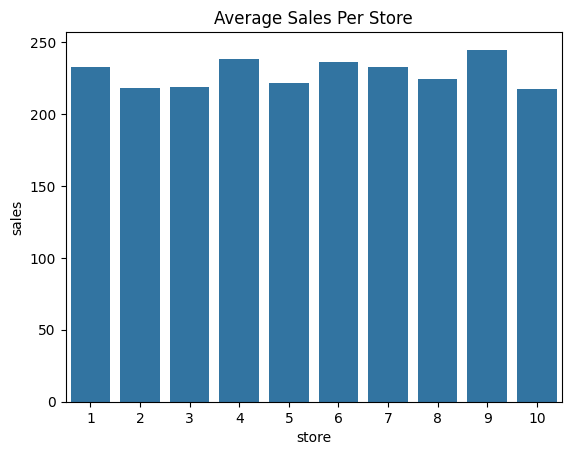

In [77]:
# Average sales per store
store_sales = df.groupby('store')['sales'].mean().reset_index()
sns.barplot(x='store', y='sales', data=store_sales)
plt.title('Average Sales Per Store')
plt.show()


In [78]:
# Interactive line plot
fig = px.line(df.reset_index(), x='date', y='sales', title='Interactive Sales Trend')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Interactive scatter plot for promotions
fig = px.scatter(df.reset_index(), x='date', y='sales', color=df['promo'].map({0:'No Promo', 1:'Promo'}),
                 title='Promotions Impact Over Time', hover_data=['store', 'holiday'])
fig.show()


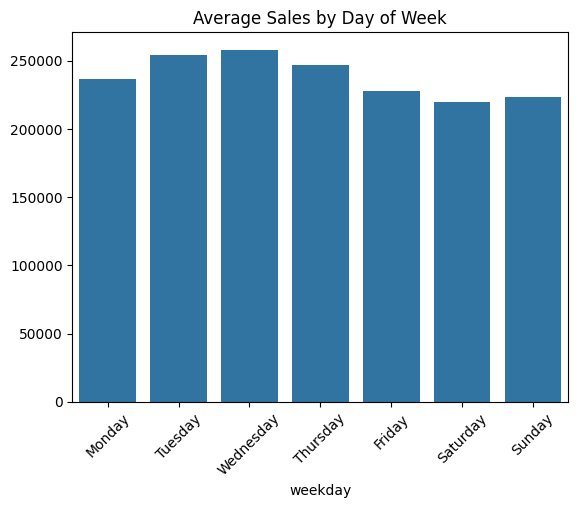

In [80]:
weekday_avg = df.groupby('weekday')['sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.barplot(x=weekday_avg.index, y=weekday_avg.values)
plt.xticks(rotation=45)
plt.title('Average Sales by Day of Week')
plt.show()


In [84]:
monthly_trends = df.groupby(['year', 'month'])['sales'].mean().reset_index()
monthly_trends['month'] = monthly_trends['month'].apply(lambda x: f'{x:02d}')
monthly_trends['year_month'] = monthly_trends['year'].astype(str) + '-' + monthly_trends['month']

fig = px.line(monthly_trends, x='year_month', y='sales', color='year', title='Monthly Sales Trends')
fig.show()


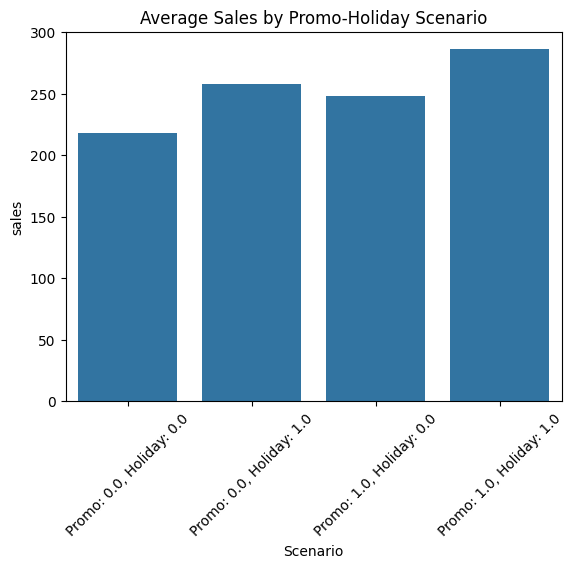

In [85]:
combo_impact = df.groupby(['promo', 'holiday'])['sales'].mean().reset_index()
combo_impact['Scenario'] = combo_impact.apply(lambda row: 
    f"Promo: {row['promo']}, Holiday: {row['holiday']}", axis=1)

sns.barplot(x='Scenario', y='sales', data=combo_impact)
plt.xticks(rotation=45)
plt.title('Average Sales by Promo-Holiday Scenario')
plt.show()


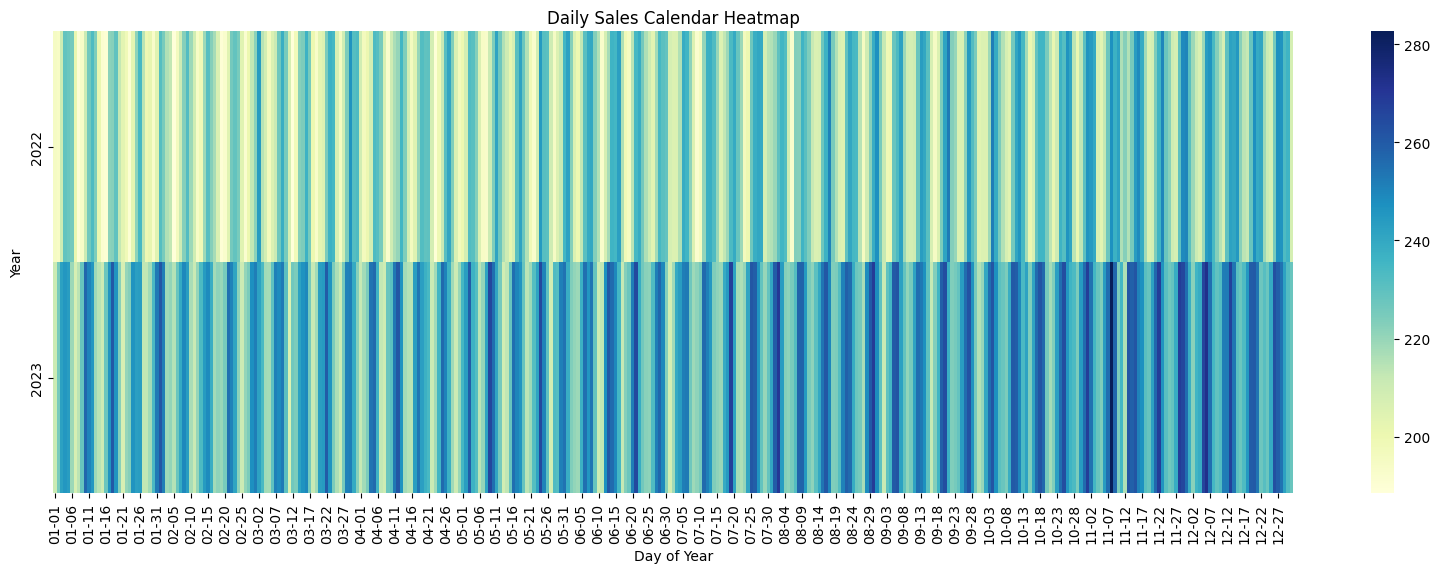

In [86]:
df['month_day'] = df.index.strftime('%m-%d')
pivot_table = df.pivot_table(values='sales', index=df.index.year, columns='month_day')

plt.figure(figsize=(20, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Daily Sales Calendar Heatmap')
plt.xlabel('Day of Year')
plt.ylabel('Year')
plt.show()


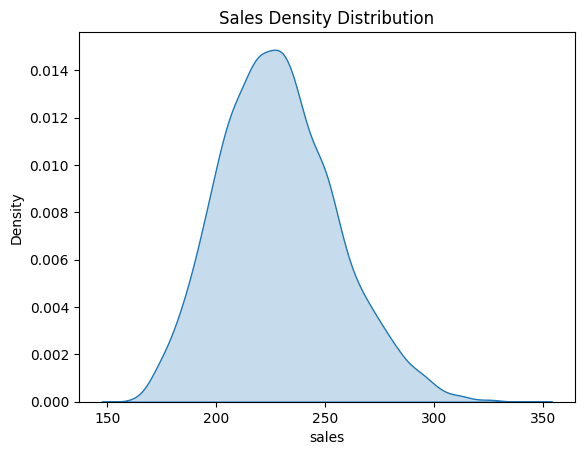

In [87]:
sns.kdeplot(data=df, x='sales', shade=True)
plt.title('Sales Density Distribution')
plt.show()
